**Librairie Nécessaire**

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import warnings


**Importer le CSV**

In [185]:
df= pd.read_csv('cardio_train.csv')

**Visalisation des données**

In [186]:
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


On constate que la visualisation de données n'est clair et pas lisible car le séparateur de données est un point virgule **;** à la place d'une virgile **,**

Remplacer le **;** en **,**

In [187]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.to_csv("cardio_train_clean.csv", sep=",", index=False)

In [188]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Informations sur le dataframe**

In [189]:
print("\nInformations sur le dataframe:")
print(df.info())


Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


**Statistiques descriptives**

In [190]:
print("\nStatistiques descriptives:")
print(df.describe())


Statistiques descriptives:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    

**Configuration pour de meilleurs graphiques**

In [191]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

**2. Pré-traitement des données**

Modification des noms de colonnes

In [192]:
nouveaux_noms = {
    "age": "Age",
    "gender": "Genre",
    "height": "Taille",
    "weight": "Poids",
    "ap_hi": "TensionSystolique",
    "ap_lo": "TensionArtérielle",
    "cholesterol": "Cholesterol",
    "gluc": "Glucose",
    "smoke": "Fumeur",
    "alco": "Alcool",
    "active": "Actif",
    "cardio": "Maladie_Cardiaque"
}

df.rename(columns=nouveaux_noms, inplace=True)

df.to_csv("cardio_train_clean.csv", index=False)

print("Colonnes renommées avec succès dans cardio_train_clean.csv")

Colonnes renommées avec succès dans cardio_train_clean.csv


**Vérification des valeurs manquantes**

In [193]:
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
id                   0
Age                  0
Genre                0
Taille               0
Poids                0
TensionSystolique    0
TensionArtérielle    0
Cholesterol          0
Glucose              0
Fumeur               0
Alcool               0
Actif                0
Maladie_Cardiaque    0
dtype: int64


**Vérification des doublons**

In [194]:
duplicates = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées: {duplicates}")


Nombre de lignes dupliquées: 0


**Conversion de l'âge de jours en années**

In [195]:
df['Age'] = (df['Age'] / 365.25).astype(int)

df.to_csv("cardio_train_clean.csv", index=False)

print("La colonne 'Age' a été convertie en années et enregistrée.")

La colonne 'Age' a été convertie en années et enregistrée.


**Analyse des distributions et identification des valeurs aberrantes**

In [196]:
def plot_boxplot_with_outliers(df, column, lower_bound=None, upper_bound=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution de {column}')
    plt.tight_layout()
    
    # Calcul des valeurs aberrantes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR if lower_bound is None else lower_bound
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    
    outliers = df[(df[column] < lower) | (df[column] > upper)][column].count()
    
    print(f"Statistiques pour {column}:")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Limite inférieure: {lower}, Limite supérieure: {upper}")
    print(f"Nombre de valeurs aberrantes: {outliers} ({outliers/len(df)*100:.2f}%)")
    
    return lower, upper


Analyse des valeurs aberrantes:


Statistiques pour Taille:
Q1: 159.0, Q3: 170.0, IQR: 11.0
Limite inférieure: 140, Limite supérieure: 200
Nombre de valeurs aberrantes: 154 (0.22%)
Statistiques pour Poids:
Q1: 65.0, Q3: 82.0, IQR: 17.0
Limite inférieure: 40, Limite supérieure: 170
Nombre de valeurs aberrantes: 67 (0.10%)
Statistiques pour TensionSystolique:
Q1: 120.0, Q3: 140.0, IQR: 20.0
Limite inférieure: 90, Limite supérieure: 170
Nombre de valeurs aberrantes: 1435 (2.05%)
Statistiques pour TensionArtérielle:
Q1: 80.0, Q3: 90.0, IQR: 10.0
Limite inférieure: 60, Limite supérieure: 110
Nombre de valeurs aberrantes: 1457 (2.08%)


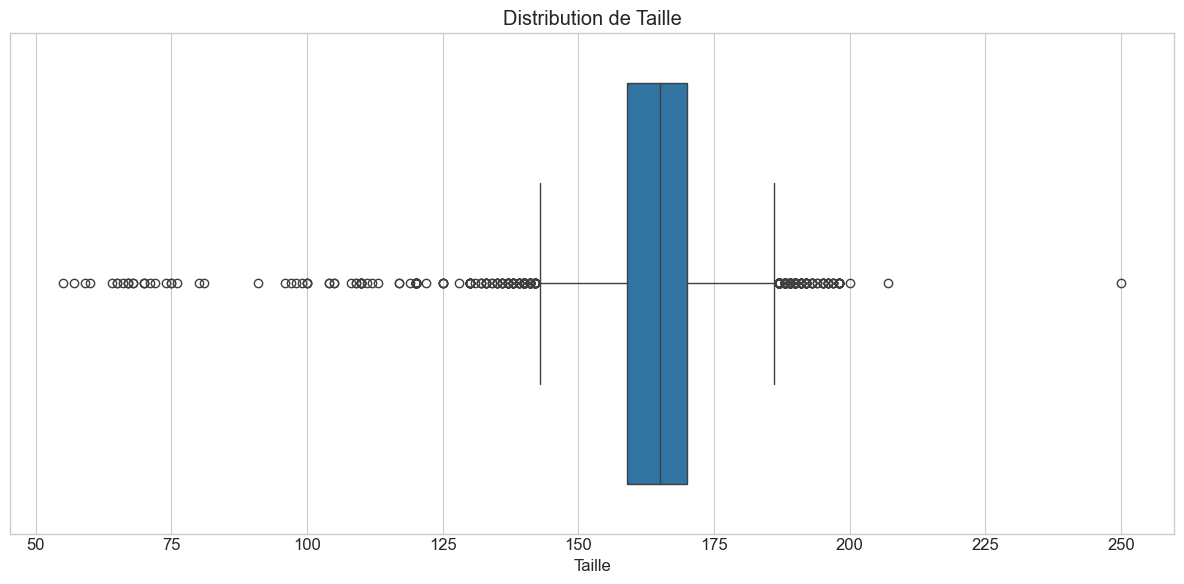

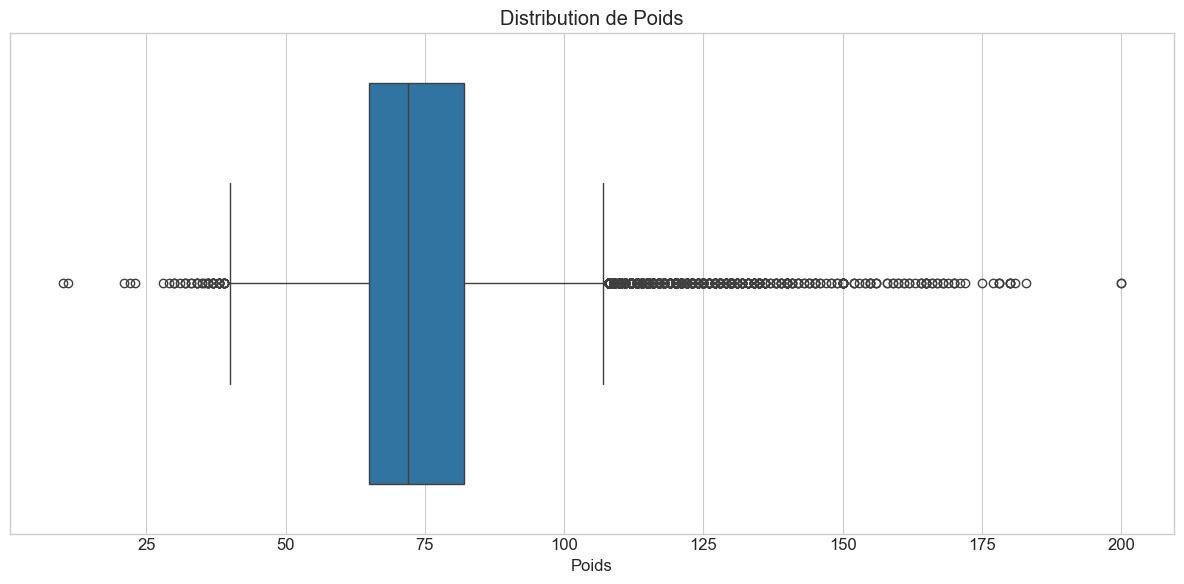

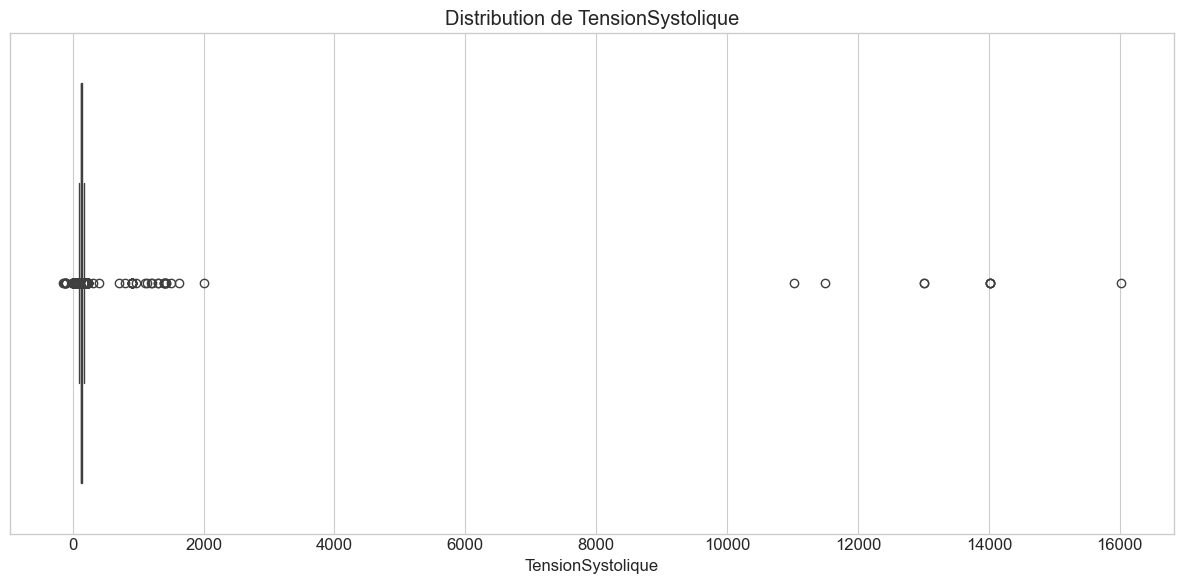

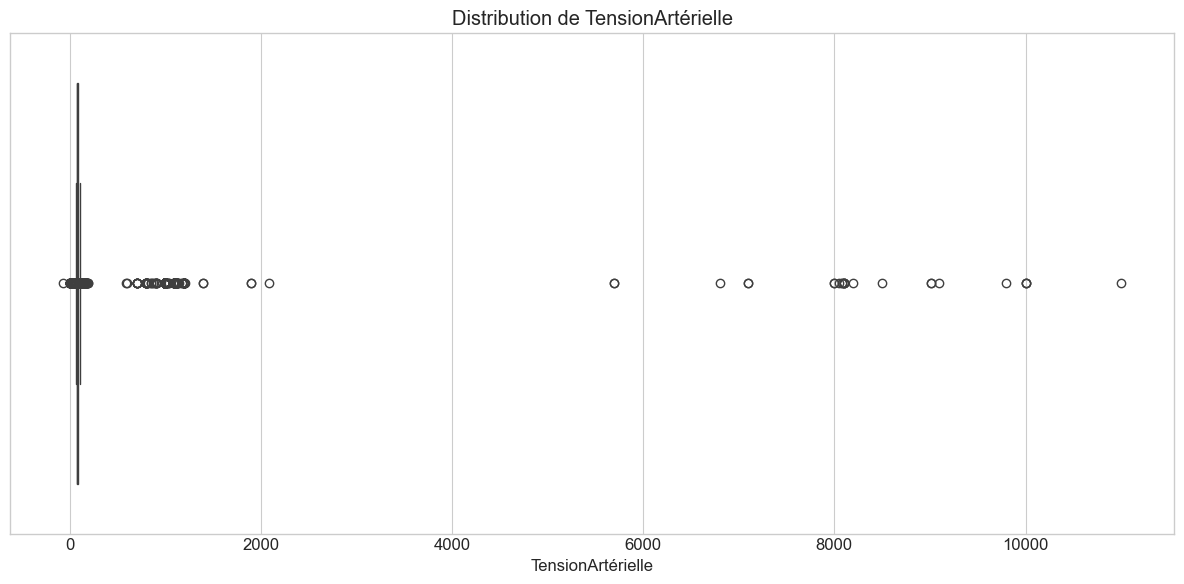

In [197]:
# Analyse et filtrage des variables médicales
print("\nAnalyse des valeurs aberrantes:")

# Taille (cm)
lower_height, upper_height = plot_boxplot_with_outliers(df, 'Taille', 140, 200)

# Poids (kg)
lower_weight, upper_weight = plot_boxplot_with_outliers(df, 'Poids', 40, 170)

# Pression artérielle systolique (mm Hg)
lower_ap_hi, upper_ap_hi = plot_boxplot_with_outliers(df, 'TensionSystolique', 90, 170)

# Pression artérielle diastolique (mm Hg)
lower_ap_lo, upper_ap_lo = plot_boxplot_with_outliers(df, 'TensionArtérielle', 60, 110)

**Filtrage des données**

In [198]:
df_clean = df.copy()
df_clean = df_clean[
    (df_clean['Taille'] >= lower_height) & (df_clean['Taille'] <= upper_height) &
    (df_clean['Poids'] >= lower_weight) & (df_clean['Poids'] <= upper_weight) &
    (df_clean['TensionSystolique'] >= lower_ap_hi) & (df_clean['TensionSystolique'] <= upper_ap_hi) &
    (df_clean['TensionArtérielle'] >= lower_ap_lo) & (df_clean['TensionArtérielle'] <= upper_ap_lo)
]

print(f"\nTaille du jeu de données original: {len(df)}")
print(f"Taille du jeu de données nettoyé: {len(df_clean)}")
print(f"Lignes supprimées: {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")


Taille du jeu de données original: 70000
Taille du jeu de données nettoyé: 67270
Lignes supprimées: 2730 (3.90%)


**Ajout d'une variable IMC (Indice de Masse Corporelle)**

In [199]:
df_clean['bmi'] = df_clean['Poids'] / ((df_clean['Taille'] / 100) ** 2)
df_clean['bmi'] = df_clean['bmi'].round(1)

**Affichage de la distribution de l'IMC**

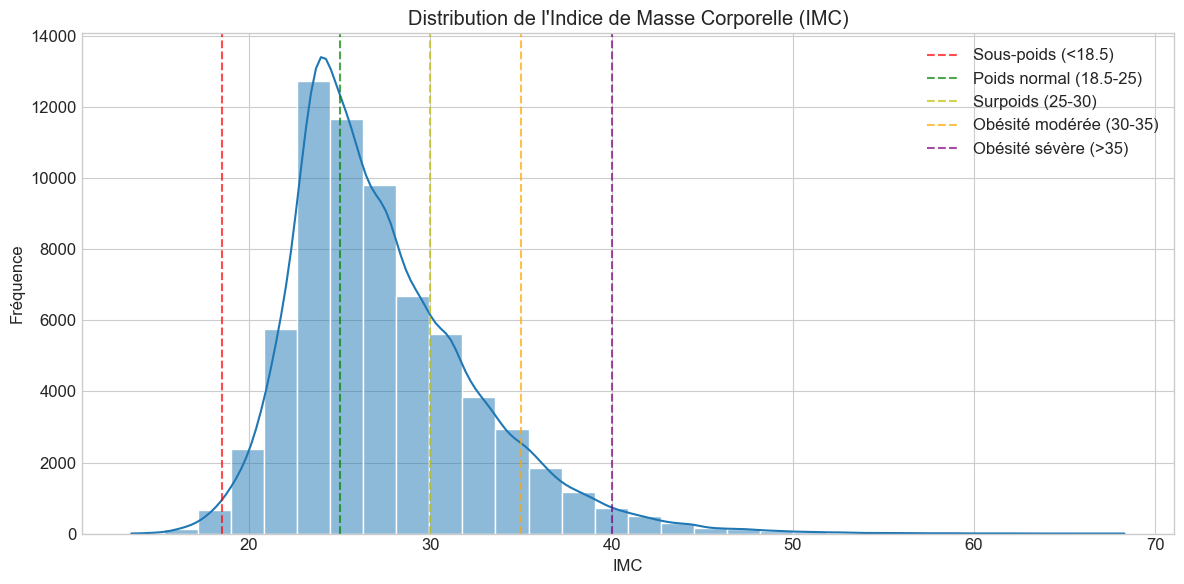

In [200]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['bmi'], bins=30, kde=True)
plt.axvline(18.5, color='r', linestyle='--', alpha=0.7, label='Sous-poids (<18.5)')
plt.axvline(25, color='g', linestyle='--', alpha=0.7, label='Poids normal (18.5-25)')
plt.axvline(30, color='y', linestyle='--', alpha=0.7, label='Surpoids (25-30)')
plt.axvline(35, color='orange', linestyle='--', alpha=0.7, label='Obésité modérée (30-35)')
plt.axvline(40, color='purple', linestyle='--', alpha=0.7, label='Obésité sévère (>35)')
plt.title('Distribution de l\'Indice de Masse Corporelle (IMC)')
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()

- On remarque clairement qu'il y a presque la moitié des poids normal sont en surpoids entre 6000 et 8000

**3. Analyse exploratoire des données**

- Affichage de la distribution de l'âge \
- Histogramme de l'âge

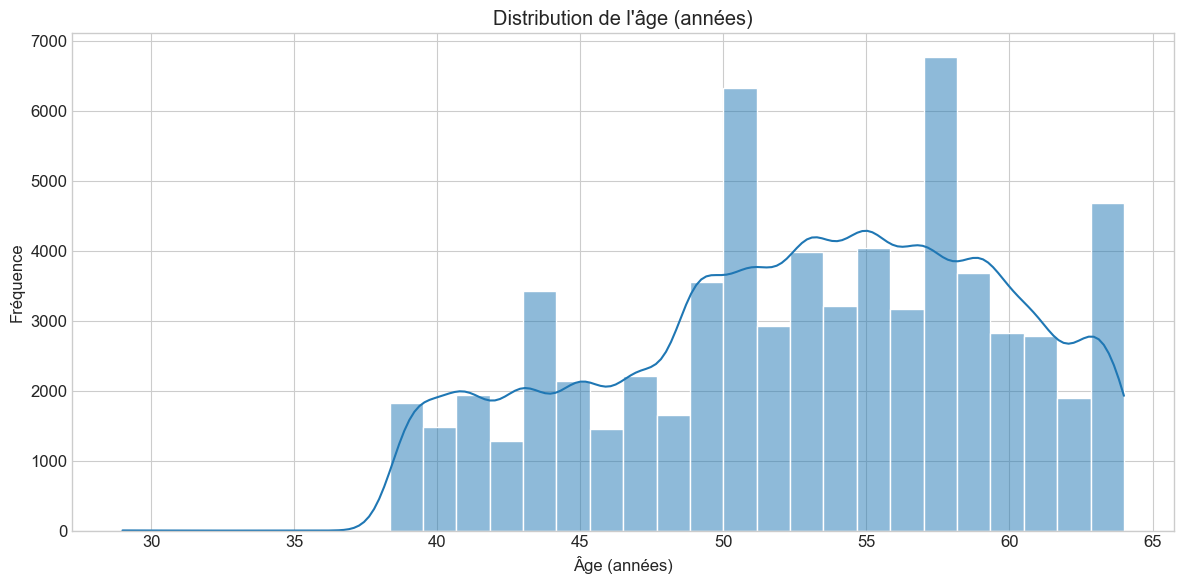

In [201]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='Age', bins=30, kde=True)
plt.title('Distribution de l\'âge (années)')
plt.xlabel('Âge (années)')
plt.ylabel('Fréquence')
plt.tight_layout()

- Grâce a ce graphique on constate que pour la distribution de l'âge il y a beaucoup plus personne ayant 50 54 56 59. Donc cela tourne autour de la cinquantaine.

**Boxplot du poids selon la variable cardio**

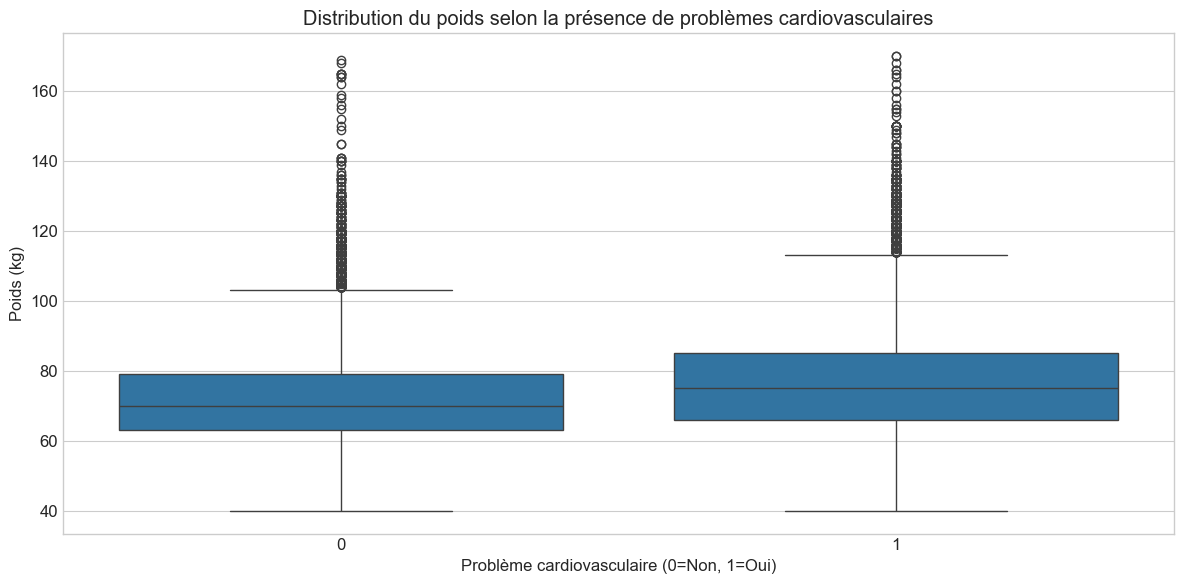

In [202]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Maladie_Cardiaque', y='Poids')
plt.title('Distribution du poids selon la présence de problèmes cardiovasculaires')
plt.xlabel('Problème cardiovasculaire (0=Non, 1=Oui)')
plt.ylabel('Poids (kg)')
plt.tight_layout()

- On constate que le poids n'est un pas un grand indicateur pour les problèmes cardiovasculaire.

**Matrice de corrélation**

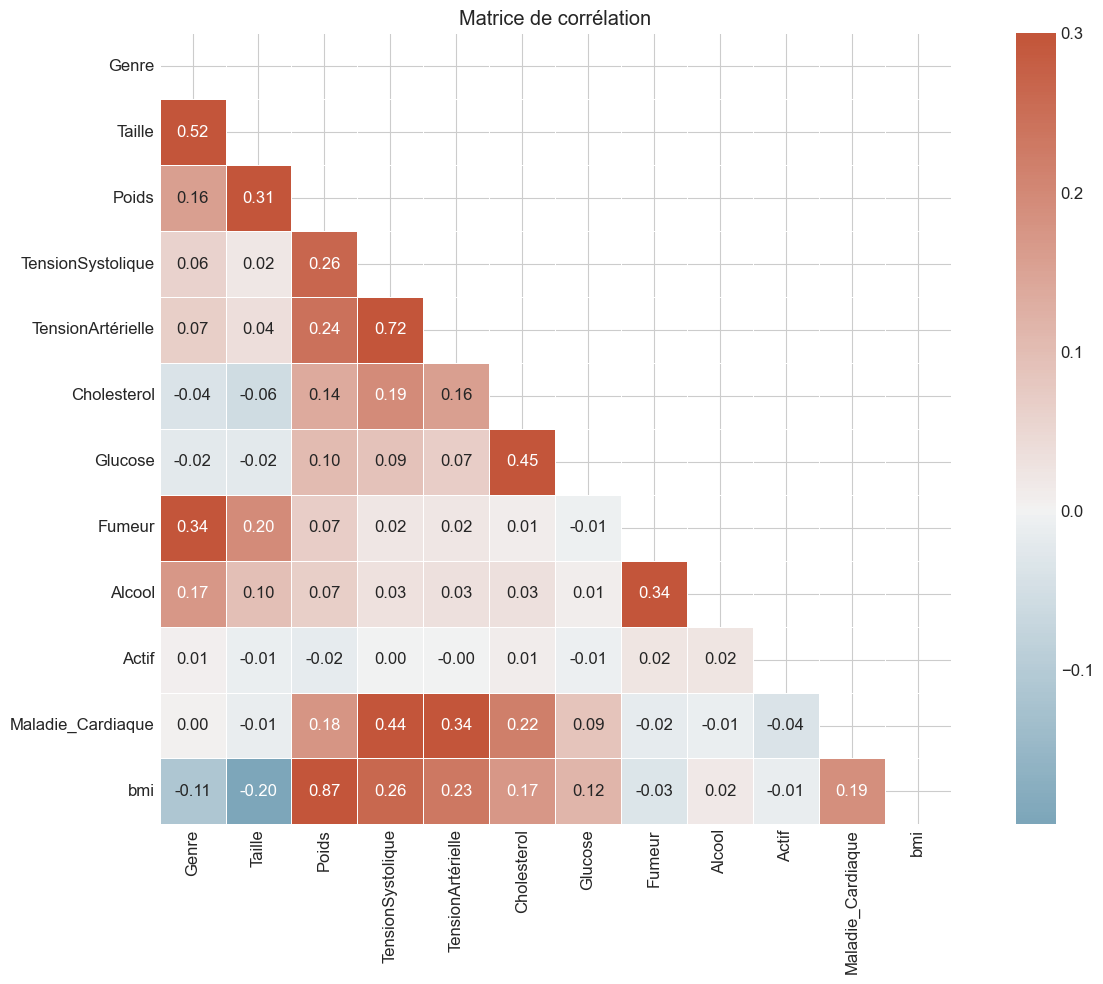

In [203]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean.drop(['id', 'Age'], axis=1).corr()
mask = np.triu(correlation_matrix)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Matrice de corrélation')
plt.tight_layout()

- Il y a une grande corrélation entre le poids et le imc. 

**Relations entre variables importantes et la cible**

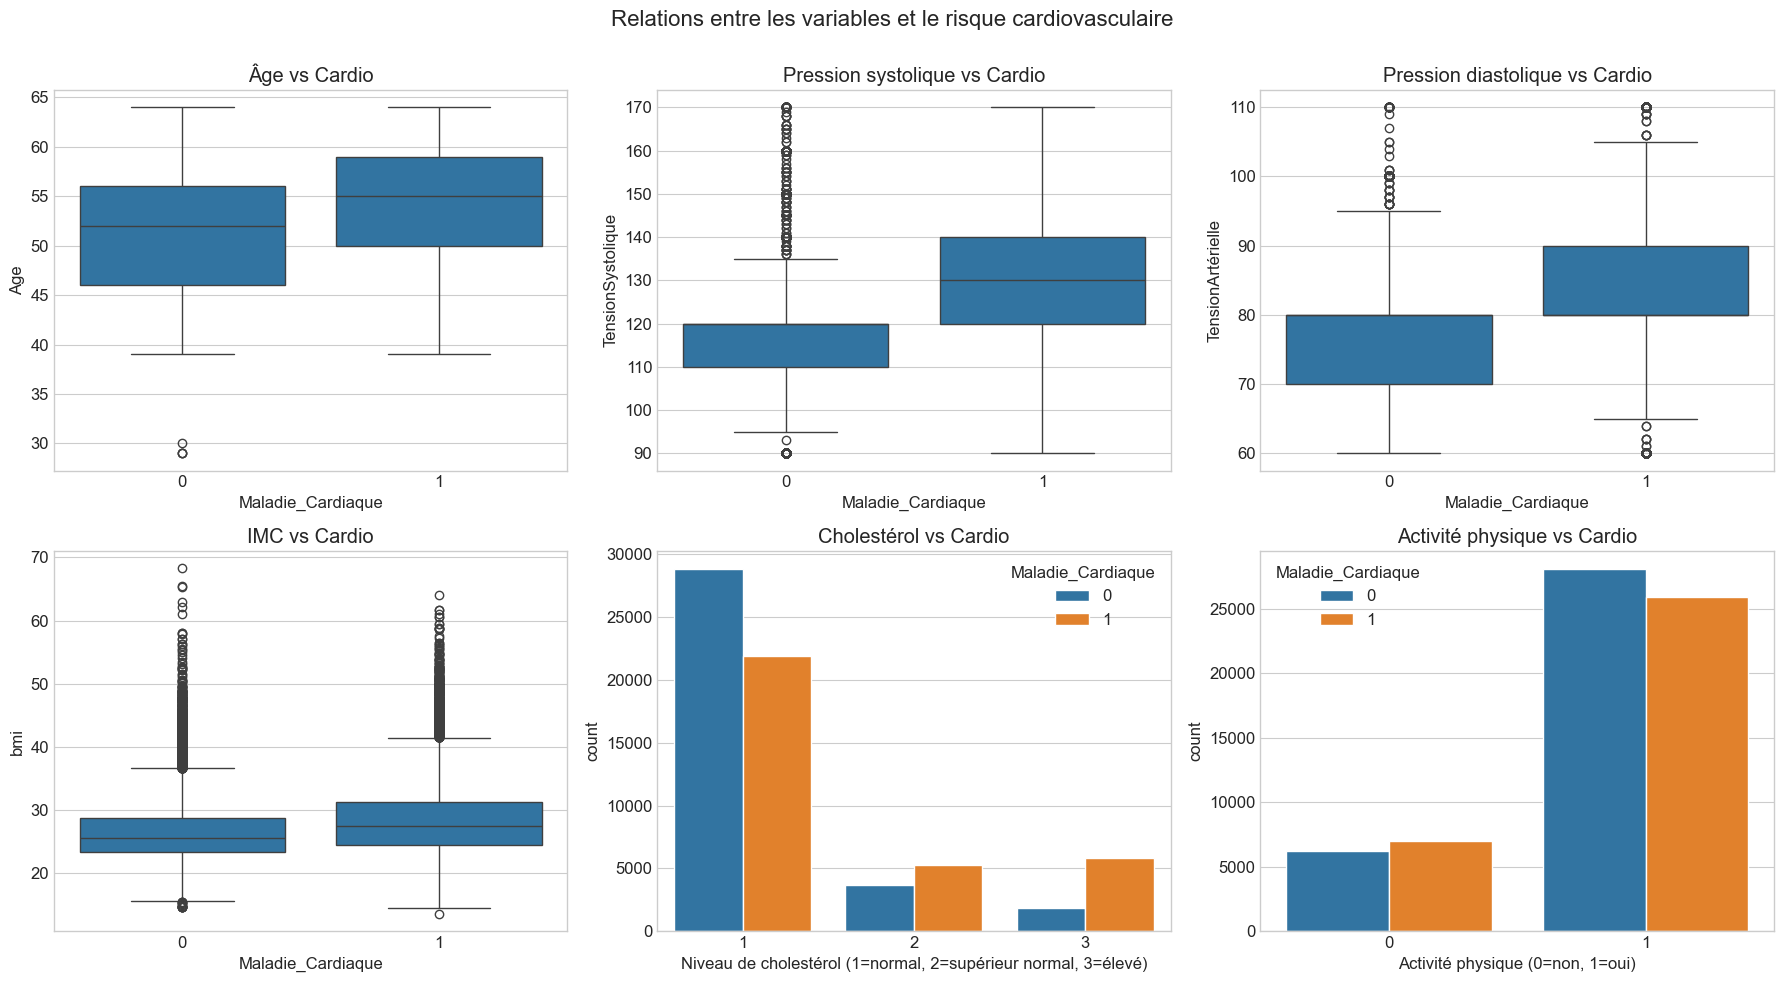

In [204]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relations entre les variables et le risque cardiovasculaire', fontsize=16)

sns.boxplot(data=df_clean, x='Maladie_Cardiaque', y='Age', ax=axes[0, 0])
axes[0, 0].set_title('Âge vs Cardio')

sns.boxplot(data=df_clean, x='Maladie_Cardiaque', y='TensionSystolique', ax=axes[0, 1])
axes[0, 1].set_title('Pression systolique vs Cardio')

sns.boxplot(data=df_clean, x='Maladie_Cardiaque', y='TensionArtérielle', ax=axes[0, 2])
axes[0, 2].set_title('Pression diastolique vs Cardio')

sns.boxplot(data=df_clean, x='Maladie_Cardiaque', y='bmi', ax=axes[1, 0])
axes[1, 0].set_title('IMC vs Cardio')

sns.countplot(data=df_clean, x='Cholesterol', hue='Maladie_Cardiaque', ax=axes[1, 1])
axes[1, 1].set_title('Cholestérol vs Cardio')
axes[1, 1].set_xlabel('Niveau de cholestérol (1=normal, 2=supérieur normal, 3=élevé)')

sns.countplot(data=df_clean, x='Actif', hue='Maladie_Cardiaque', ax=axes[1, 2])
axes[1, 2].set_title('Activité physique vs Cardio')
axes[1, 2].set_xlabel('Activité physique (0=non, 1=oui)')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

On remarque que la pression systolique est un bon indicateur.

**Analyse des facteurs de risque**

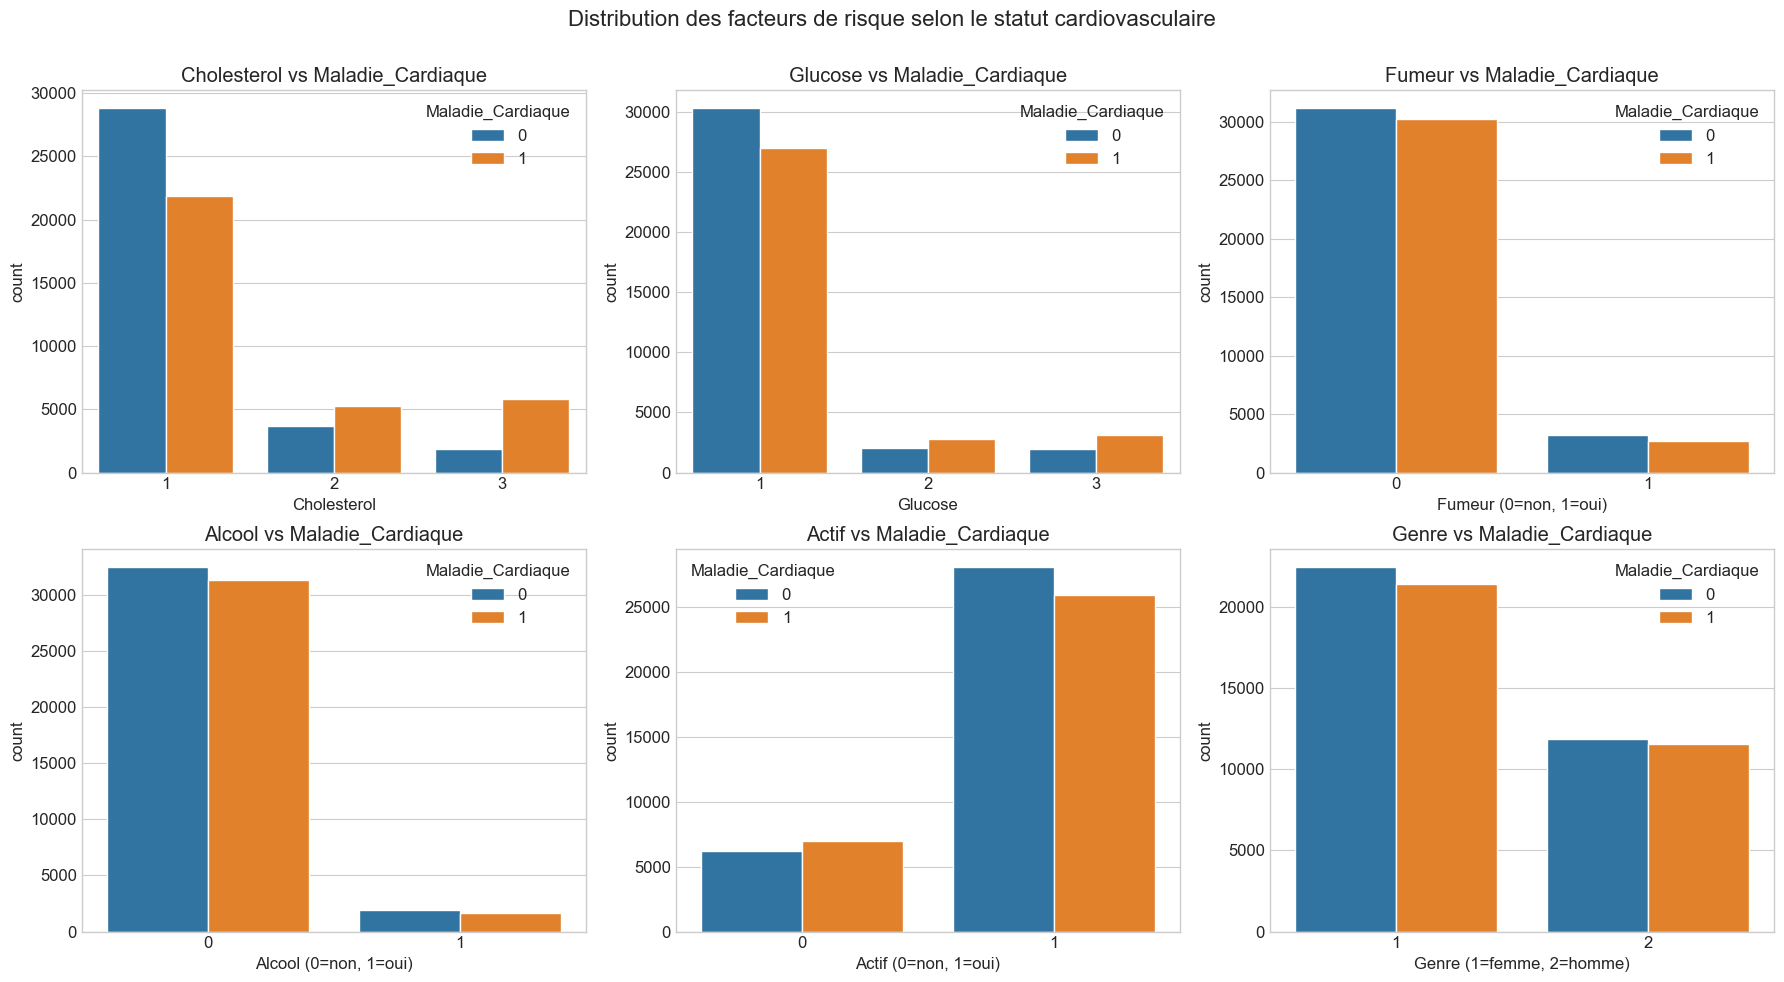

In [205]:
risk_factors = ['Cholesterol', 'Glucose', 'Fumeur', 'Alcool', 'Actif', 'Genre']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, factor in enumerate(risk_factors):
    sns.countplot(data=df_clean, x=factor, hue='Maladie_Cardiaque', ax=axes[i])
    axes[i].set_title(f'{factor} vs Maladie_Cardiaque')
    
    if factor == 'cholesterol' or factor == 'gluc':
        axes[i].set_xlabel(f'{factor} (1=normal, 2=supérieur normal, 3=élevé)')
    elif factor in ['Fumeur', 'Alcool', 'Actif']:
        axes[i].set_xlabel(f'{factor} (0=non, 1=oui)')
    elif factor == 'Genre':
        axes[i].set_xlabel('Genre (1=femme, 2=homme)')

plt.tight_layout()
plt.suptitle('Distribution des facteurs de risque selon le statut cardiovasculaire', fontsize=16)
plt.subplots_adjust(top=0.9)


**Création de variable pour trouver la meilleur combinaison**

In [206]:
df = pd.read_csv('cardio_train_clean.csv')
age = df['Age']
gender = df['Genre']
height = df['Taille']
weight = df['Poids']
ap_hi = df['TensionSystolique']
ap_lo = df['TensionArtérielle']
cholesterol = df['Cholesterol']
gluc = df['Glucose']
smoke = df['Fumeur']
alco = df['Alcool']
active = df['Actif']
cardio = df['Maladie_Cardiaque']
df.head()


,id,Age,Genre,Taille,Poids,TensionSystolique,TensionArtérielle,Cholesterol,Glucose,Fumeur,Alcool,Actif,Maladie_Cardiaque
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Genre              70000 non-null  int64  
 3   Taille             70000 non-null  int64  
 4   Poids              70000 non-null  float64
 5   TensionSystolique  70000 non-null  int64  
 6   TensionArtérielle  70000 non-null  int64  
 7   Cholesterol        70000 non-null  int64  
 8   Glucose            70000 non-null  int64  
 9   Fumeur             70000 non-null  int64  
 10  Alcool             70000 non-null  int64  
 11  Actif              70000 non-null  int64  
 12  Maladie_Cardiaque  70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Fonction pour trouver la meilleur de combinaison de colonne pour entrainer le model**


In [208]:
# def generate_combinations(input_list):
#     import itertools
#     all_combinations = []

#     # generate all generation with size 2 , then 3 ect...
#     for i in range(2, 9):
#         combinations = list(itertools.combinations(input_list, i))
#         all_combinations.extend(combinations)
    
#     return all_combinations
# # , weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active
# columns = [ age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]
# strColumns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# target = cardio

# def FindBestFeatureCombination(allFeatures ,y,strFeatures):
#     best_score = float(0)
#     best_combination = []
#     allCombination= generate_combinations(allFeatures)
#     strCombination= generate_combinations(strFeatures)
#     strIndex = 0
#     for combination in allCombination:
#         # print(np.shape(combination))
#         # print(np.shape(y))
#         # divide dataset between test(80%) and train(20%)
#         combination = np.array(combination)
#         combination = combination.T
#         X_train, X_test, y_train, y_test = train_test_split(combination, y, test_size=0.2, random_state=0)
       
#         model = LogisticRegression(max_iter= 70000)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         score = accuracy_score( y_test,y_pred)
#         # if the score is better , we keep it 
#         if score > best_score:
#             best_score = score
#             best_combination = strCombination[strIndex]
#         strIndex +=1

#     # print the best combination with the best score 
#     print(f"Meilleure combinaison : {best_combination} avec un score de {best_score}")

# FindBestFeatureCombination(columns,target,strColumns)
# # generate_combinations(columns)

Entrainement du model

In [209]:
X = df[['Age', 'Genre', 'Poids', 'TensionSystolique', 'Cholesterol', 'Actif']].values

y= df['Maladie_Cardiaque']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(max_iter=10000)

**7** \
Prédiction de rsique cardio vasculaire pour Arthur :
- 53 ans 
- fumeur
- sportif 
- 175 cm
- 85 kg
- taux de cholestérol au dessus de la normal 
- taux de glucose normal
- tension artérielle systolique dans la moyenne
- pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un
sujet à risques cardio-vasculaire.

In [210]:
arthur = [53,2,85,df['TensionSystolique'].mean(),2,1]
y_pred = model.predict([arthur])
y_pred_prob = model.predict_proba([arthur])
print(f"prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : " + str(y_pred))
print(f"probabilité de la prédiction : " + str(y_pred_prob[0][1]))

prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : [1]
probabilité de la prédiction : 0.6195601288410342


**7**  **Résultat** \
D'après l'algorythme , Arthur n'a pas de risque cardio vasculaire avec une probabilité de 0,61 , c'est a dire qu'il y a 61% de risque cardio vasculaire 

Regression logistique sans parametre modifié


Accuracy: 0.7193571428571428
Matrice de confusion:
 [[5412 1657]
 [2272 4659]]
classification_report :
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



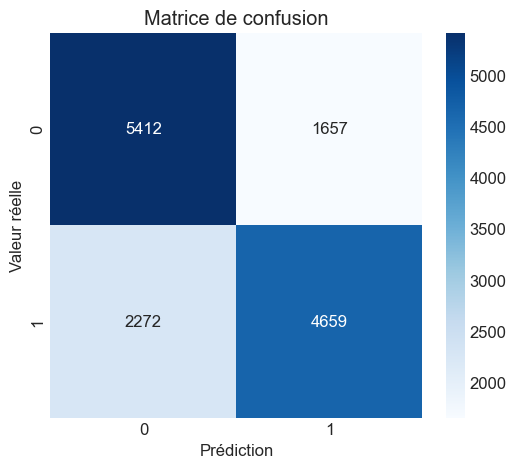

In [211]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

**Modification des paramètres  afin d'avoir un meilleur de taux de bonne prédiction :**

Regression Logistique en modifiant le seuil de décision ❌

Accuracy: 0.7193571428571428
Matrice de confusion:
 [[5412 1657]
 [2272 4659]]


classification_report :
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



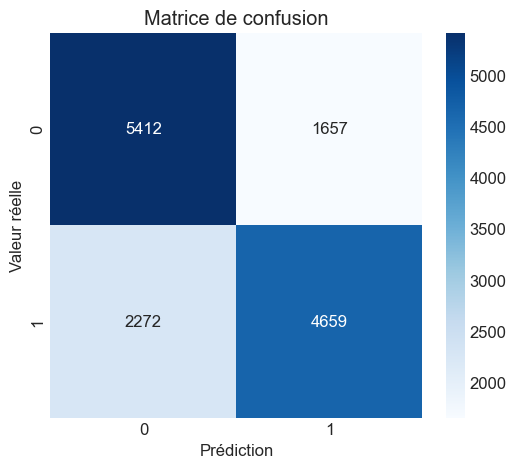

In [212]:

y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.45
y_pred_thresh = (y_prob >= threshold).astype(int)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

Modification du L1 ❌

In [213]:

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleur paramètre C :", grid.best_params_)

Meilleur paramètre C : {'C': 0.1}


Essaie avec class_weight = "balanced" ❌

Accuracy: 0.719
Matrice de confusion:
 [[5405 1664]
 [2270 4661]]
classification_report :
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



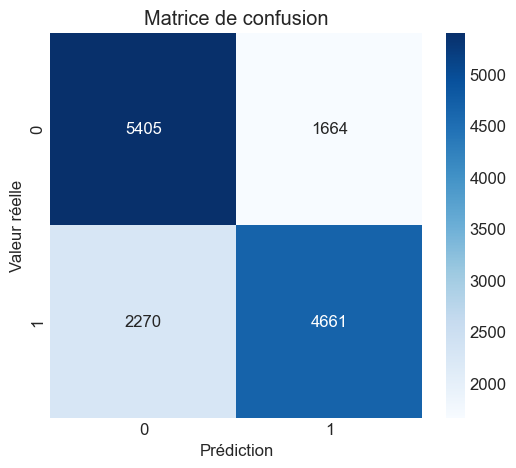

In [214]:
X = df[['Age', 'Genre', 'Poids', 'TensionSystolique', 'Cholesterol', 'Actif']].values

y= df['Maladie_Cardiaque']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_balanced = LogisticRegression(class_weight="balanced",max_iter=10000)
model_balanced.fit(X,y)

y_pred = model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

Aucun gain n'a été aperçu , l'entrainement du model initial est le meilleur résultat constaté.